In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score 
import statsmodels.api as sm

## Read in mulitple csv files

In [2]:
# read in mulitple csv files
csv_files = ['data/gc_CGSS_RES_2024_M200_SEC01_fullgc_2024-02-27-11-47-30.csv',
             'data/gc_CGSS_RES_2024_M200_SEC02_fullgc_2024-02-27-11-46-45.csv',
             'data/gc_CGSS_RES_2024_M200_SEC04_fullgc_2024-02-27-11-45-43.csv',
             'data/gc_CGSS_RES_2024_M200_SEC05_fullgc_2024-02-27-11-41-46.csv' ,
             'data/gc_CGSS_RES_2024_M200_SEC06_fullgc_2024-02-27-11-40-29.csv',
             'data/gc_CGSS_RES_2024_M200_SEC07_fullgc_2024-02-27-11-39-47.csv',
             'data/gc_CGSS_RES_2024_M200_SEC08_fullgc_2024-02-27-11-38-45.csv',
             'data/gc_CGSS_RES_2024_M200_SEC09_fullgc_2024-02-27-11-35-51.csv',
             'data/gc_CGSS_RES_2024_M200_SEC10_fullgc_2024-02-27-11-34-33.csv',
             'data/gc_CGSS_RES_2024_M200_SEC11_fullgc_2024-02-27-11-35-06.csv', 
             'data/gc_CGSS_RES_2024_M200_SEC12_fullgc_2024-02-27-11-51-42.csv', 
             'data/gc_CGSS_RES_2024_M200_SEC13_fullgc_2024-02-27-11-30-36.csv', 
             'data/gc_CGSS_RES_2024_M200_SEC14_fullgc_2024-02-27-11-25-54.csv', 
             'data/gc_CGSS_RES_2024_M200_SEC15_fullgc_2024-02-27-11-53-00.csv',
             'data/gc_CGSS_RES_2024_M200_SEC16_fullgc_2024-02-27-11-53-56.csv',
             'data/gc_CGSS_RES_2024_M200_SEC17_fullgc_2024-02-27-11-13-09.csv',
             'data/gc_CGSS_RES_2024_M200_SEC18_fullgc_2024-02-27-11-11-21.csv',
             'data/gc_CGSS_RES_2024_M200_SEC19_fullgc_2024-02-27-11-10-45.csv'
            ]

# Initialize an empty list to store DataFrames
dataframes = []

# Read the first CSV file to get the column headers
initial_df = pd.read_csv(csv_files[0])
initial_columns = initial_df.columns

# Loop through the list of files
for file in csv_files:
    # Read the current CSV file into a DataFrame, ensuring it matches the initial columns
    df = pd.read_csv(file, usecols=lambda column: column in initial_columns).reindex(columns=initial_columns)
       
    # Drop rows where all cells are blank
    df.dropna(how='all', inplace=True)
    
    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
m200_df = pd.concat(dataframes, ignore_index=True)

# Optionally, handle blanks in the compiled DataFrame as well

# Save the compiled DataFrame
m200_df.to_csv('data/m200_compiled_dataframe.csv', index=False)


## Begin cleaning data frame for descriptive analysis

In [3]:
# Assuming column 11 is 'M200B1 BB_exam_us' for US and column 12 is 'M200B1 BB_exam_ims' for international
# This will create a new column 'Combined_Scores' which has all scores, prioritizing US scores and filling in missing values with International scores.
m200_df['Combined_Scores'] = m200_df['M200B1 BB_exam_us'].combine_first(m200_df['M200B1 BB_exam_ims'])

# Save the updated DataFrame
m200_df.to_csv('data/m200_compiled_dataframe_scores_combined.csv', index=False)


In [4]:
m200_df.head()

,Last Name,First Name,Username,Learner ID,Last Access,Availability,Weighted Total,Total pts,M200P1 CTGL,M299A1 -div_mvmt_plan,M200B1 BB_exam_us,M200B1 BB_exam_ims,Combined_Scores
0,ACOSTA,MITCHELL,mitch.f.acosta,01C,2/26/2024 7:50,Yes,94.45000,285.50000,99,98.5,88.0,NaN,88.0
1,ALLEN,JUSTIN,justin.lee.allen,01A,2/17/2024 14:04,Yes,93.70000,283.00000,100,95.0,88.0,NaN,88.0
2,ALLISON,KEVIN,kevin.e.allison,01A,1/31/2024 11:29,Yes,95.09828,284.99429,93.99429,95.0,96.0,NaN,96.0
3,ALSUWAIDI,AHMED SAIF ABDULLA AHMED,alsuwaidi@hotmail.fr,01D,2/26/2024 13:59,Yes,89.10000,269.00000,93,92.0,NaN,84.0,84.0
4,ANDERSON,ALEX,alex.r.anderson,01C,2/26/2024 7:41,Yes,94.25000,283.50000,97,94.5,92.0,NaN,92.0


In [5]:
m200_df.tail()

,Last Name,First Name,Username,Learner ID,Last Access,Availability,Weighted Total,Total pts,M200P1 CTGL,M299A1 -div_mvmt_plan,M200B1 BB_exam_us,M200B1 BB_exam_ims,Combined_Scores
1036,WEAVER,BRIAN,brian.weaver9,19B,1/29/2024 9:08,Yes,94.99828,285.99429,93.99429,100.0,92.0,NaN,92.0
1037,WESTFALL,SAMUEL,samuel.g.westfall,19D,2/7/2024 11:20,Yes,90.29828,272.99429,93.99429,95.0,84.0,NaN,84.0
1038,WORKMAN,JASON,jason.workman3,19D,2/7/2024 8:20,Yes,88.79828,267.99429,93.99429,90.0,84.0,NaN,84.0
1039,WYATT,NICHOLAS,nicholas.j.wyatt,19D,1/25/2024 11:45,Yes,88.79828,267.99429,93.99429,90.0,84.0,NaN,84.0
1040,YOUNG,ROBERT,robert.d.young52,19C,2/11/2024 14:36,Yes,95.00000,286.00000,99.0,95.0,92.0,NaN,92.0


In [6]:
# Listing all column names in the DataFrame
column_names = m200_df.columns.tolist()
print(column_names)

['Last Name', 'First Name', 'Username', 'Learner ID', 'Last Access', 'Availability', 'Weighted Total', 'Total pts', 'M200P1 CTGL', 'M299A1 -div_mvmt_plan', 'M200B1 BB_exam_us', 'M200B1 BB_exam_ims', 'Combined_Scores']


In [7]:
# Assuming you want to keep columns named 
m200_df = m200_df[['Last Name',
                   'First Name',
                   'Learner ID', 
                   'Weighted Total', 
                   'Total pts',
                   'M200P1 CTGL',
                   'M299A1 -div_mvmt_plan',
                   'M200B1 BB_exam_us',
                   'M200B1 BB_exam_ims',
                   'Combined_Scores']]
# new df
m200_df.to_csv('data/m200_df_modified.csv', index=False)

In [8]:
# Define a new list of column names
new_column_names = ['last_name',
                   'first_name',
                   'SG',
                   'Wt_total', 
                   'Total_pts',
                   'CTGL',
                   'div_mvmt_plan',
                   'BB_exam_us',
                   'BB_exam_ims',
                   'Combined_Scores'
                   ]  
                    # Continue this list to match the number of columns in your DataFrame

# Assign the new column names to the DataFrame
m200_df.columns = new_column_names

In [9]:
# Listing all column names in the DataFrame
column_names = m200_df.columns.tolist()
print(column_names)

['last_name', 'first_name', 'SG', 'Wt_total', 'Total_pts', 'CTGL', 'div_mvmt_plan', 'BB_exam_us', 'BB_exam_ims', 'Combined_Scores']


## Begin descriptive analysis

In [10]:
# details the number of rows, columns- determines number of studnets in dataframe
m200_df.shape


(1041, 10)

In [11]:
pd.set_option('display.precision', 2)

m200_df.Wt_total.describe()

count    1035.00
mean       93.88
std         3.03
min        80.80
25%        92.20
50%        94.40
75%        96.00
max        99.70
Name: Wt_total, dtype: float64

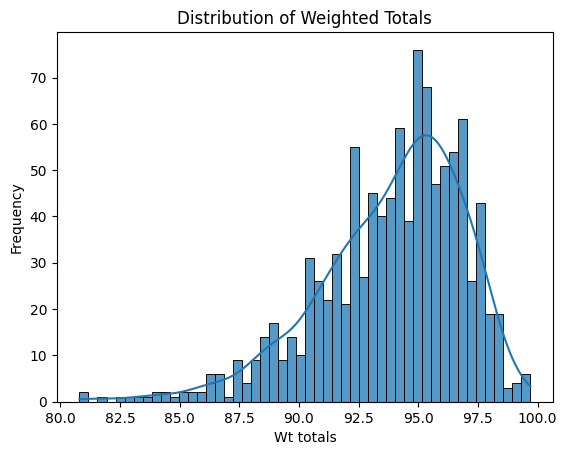

In [12]:
# Assuming 'm200_df' is your DataFrame and 'CTGL' is the column you're interested in
sns.histplot(m200_df['Wt_total'].dropna(),kde=True, bins=50, alpha=0.75)
plt.title('Distribution of Weighted Totals')
plt.xlabel('Wt totals')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('figure/m200_df_wt_ttl.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.show()

In [13]:
pd.set_option('display.precision', 2)

m200_df['CTGL'] = pd.to_numeric(m200_df['CTGL'], errors='coerce')

m200_df.CTGL.describe()

count    1006.00
mean       94.88
std         2.33
min        85.00
25%        93.99
50%        94.99
75%        96.99
max       100.00
Name: CTGL, dtype: float64

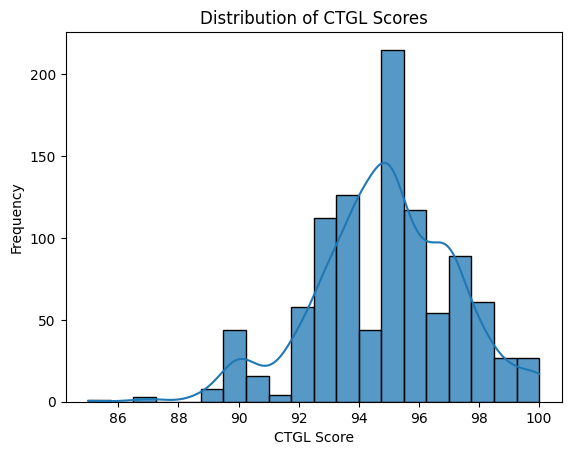

In [14]:
# Assuming 'm200_df' is your DataFrame and 'CTGL' is the column you're interested in
sns.histplot(m200_df['CTGL'].dropna(),kde=True, bins=20, alpha=0.75)
plt.title('Distribution of CTGL Scores')
plt.xlabel('CTGL Score')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('figure/m200_df_ctgl.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.show()


In [15]:
pd.set_option('display.precision', 2)

m200_df['div_mvmt_plan'] = pd.to_numeric(m200_df['div_mvmt_plan'], errors='coerce')

m200_df.div_mvmt_plan.describe()

count    1034.00
mean       94.93
std         2.51
min        80.00
25%        94.00
50%        95.00
75%        96.00
max       100.00
Name: div_mvmt_plan, dtype: float64

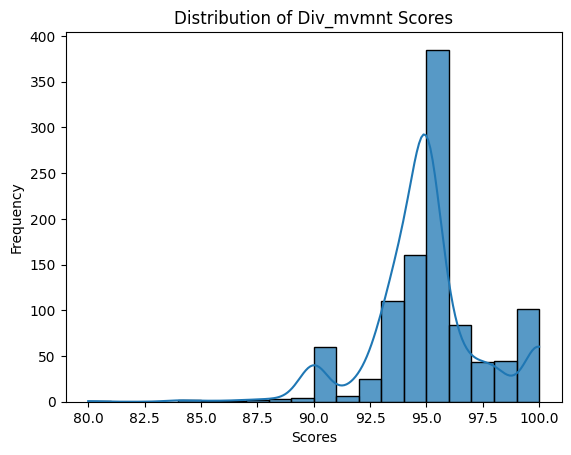

In [16]:
# Assuming 'm200_df' is your DataFrame and 'CTGL' is the column you're interested in
sns.histplot(m200_df['div_mvmt_plan'].dropna(), kde=True, bins=20, alpha=0.75)
plt.title('Distribution of Div_mvmnt Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('figure/m200_df_div_mvmnt.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.show()

In [17]:
pd.set_option('display.precision', 2)

m200_df['BB_exam_us'] = pd.to_numeric(m200_df['BB_exam_us'], errors='coerce')

m200_df.BB_exam_us.describe()

count    916.00
mean      92.47
std        6.54
min       64.00
25%       88.00
50%       92.00
75%       96.00
max      100.00
Name: BB_exam_us, dtype: float64

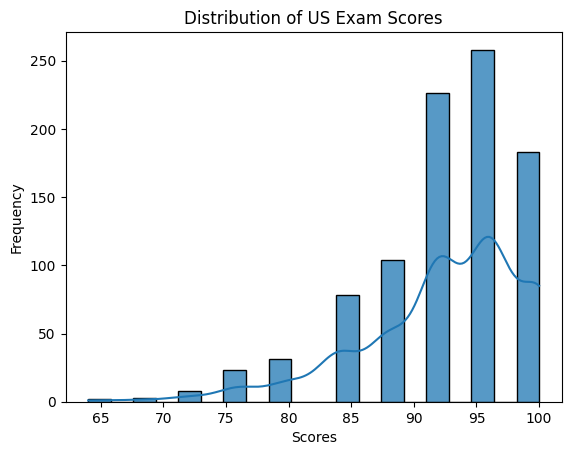

In [18]:
# Assuming 'm200_df' is your DataFrame and 'CTGL' is the column you're interested in
sns.histplot(m200_df['BB_exam_us'].dropna(), kde=True, bins=20, alpha=0.75)
plt.title('Distribution of US Exam Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('figure/m200_df_bb_exam_us.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.show()

In [19]:
pd.set_option('display.precision', 2)

m200_df['BB_exam_ims'] = pd.to_numeric(m200_df['BB_exam_ims'], errors='coerce')

m200_df.BB_exam_ims.describe()

count    120.00
mean      90.87
std       11.23
min        0.00
25%       88.00
50%       92.00
75%       96.00
max      100.00
Name: BB_exam_ims, dtype: float64

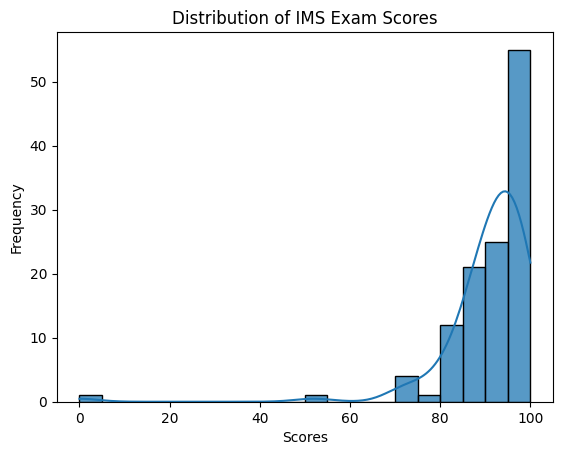

In [20]:
# Assuming 'm200_df' is your DataFrame and 'CTGL' is the column you're interested in
sns.histplot(m200_df['BB_exam_ims'].dropna(), kde=True, bins=20, alpha=0.75)
plt.title('Distribution of IMS Exam Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('figure/m200_df_bb_exam_ims.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.show()

In [21]:
pd.set_option('display.precision', 2)

m200_df['Combined_Scores'] = pd.to_numeric(m200_df['Combined_Scores'], errors='coerce')

m200_df.Combined_Scores.describe()

count    1035.00
mean       92.37
std         6.66
min        52.00
25%        88.00
50%        92.00
75%        96.00
max       100.00
Name: Combined_Scores, dtype: float64

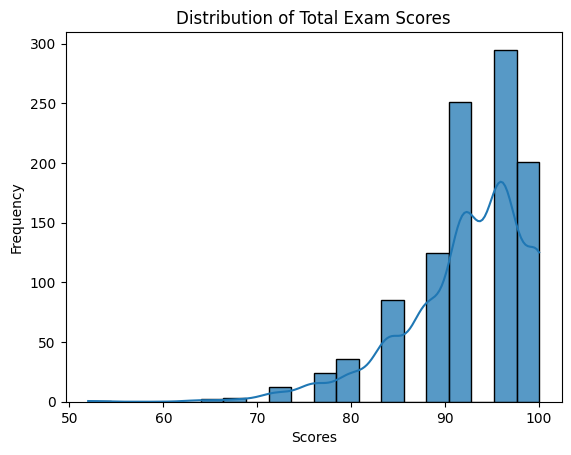

In [22]:
# Assuming 'm200_df' is your DataFrame and 'CTGL' is the column you're interested in
sns.histplot(m200_df['Combined_Scores'].dropna(), kde=True, bins=20, alpha=0.75)
plt.title('Distribution of Total Exam Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('figure/m200_df_bb_exam_ttl.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.show()

## CTGL analysis

In [23]:
# Splitting the 'SG' column into two parts: numeric for 'team' and letter for 'staff_gp'
m200_df[['team', 'staff_gp']] = m200_df['SG'].str.extract(r'(\d+)([A-Za-z])')

# Fill NaN values in 'team' column to ensure conversion can happen. Here, '0' is used as a placeholder.
m200_df['team'] = m200_df['team'].fillna('0')

# Removing leading zeros from 'team' - converting to int and back to string will do this
m200_df['team'] = m200_df['team'].astype(int).astype(str)

# Optionally, replace the '0' placeholder with NaN or another placeholder if needed
# m200_df['team'] = m200_df['team'].replace('0', pd.NA)

# Now your DataFrame m200_df has two new columns: 'team' and 'staff_gp'
print(m200_df.head())



   last_name                first_name   SG  Wt_total  Total_pts    CTGL  \
0     ACOSTA                  MITCHELL  01C     94.45     285.50   99.00   
1      ALLEN                    JUSTIN  01A     93.70     283.00  100.00   
2    ALLISON                     KEVIN  01A     95.10     284.99   93.99   
3  ALSUWAIDI  AHMED SAIF ABDULLA AHMED  01D     89.10     269.00   93.00   
4   ANDERSON                      ALEX  01C     94.25     283.50   97.00   

   div_mvmt_plan  BB_exam_us  BB_exam_ims  Combined_Scores team staff_gp  
0           98.5        88.0          NaN             88.0    1        C  
1           95.0        88.0          NaN             88.0    1        A  
2           95.0        96.0          NaN             96.0    1        A  
3           92.0         NaN         84.0             84.0    1        D  
4           94.5        92.0          NaN             92.0    1        C  


In [24]:
# Now, save the modified DataFrame to a new CSV file
m200_df.to_csv('data/team_brkout_m200_df.csv', index=False)  # Set index=False if you don't want to save the index

print("DataFrame saved as 'team_brkout_m200_df.csv'.")

DataFrame saved as 'team_brkout_m200_df.csv'.


In [25]:
# Descriptive statistics for CTGL and other assessments
print(m200_df[['CTGL', 'Total_pts', 'BB_exam_us', 'BB_exam_ims', 'Combined_Scores']].describe())


          CTGL  Total_pts  BB_exam_us  BB_exam_ims  Combined_Scores
count  1006.00    1035.00      916.00       120.00          1035.00
mean     94.88     279.42       92.47        90.87            92.37
std       2.33      18.32        6.54        11.23             6.66
min      85.00      92.00       64.00         0.00            52.00
25%      93.99     276.99       88.00        88.00            88.00
50%      94.99     283.00       92.00        92.00            92.00
75%      96.99     287.99       96.00        96.00            96.00
max     100.00     299.00      100.00       100.00           100.00


2. Correlation Analysis
Perform a correlation analysis to see if there is a statistical relationship between CTGL scores and other assessment scores. This can help identify if there is a pattern that suggests compensation.

In [26]:
# Correlation matrix
correlation_matrix = m200_df[['CTGL', 'Total_pts', 'BB_exam_us', 'BB_exam_ims', 'Combined_Scores']].corr()
print(correlation_matrix)


                 CTGL  Total_pts  BB_exam_us  BB_exam_ims  Combined_Scores
CTGL             1.00       0.50        0.06        -0.09             0.06
Total_pts        0.50       1.00        0.39         0.22             0.39
BB_exam_us       0.06       0.39        1.00          NaN             1.00
BB_exam_ims     -0.09       0.22         NaN         1.00             0.63
Combined_Scores  0.06       0.39        1.00         0.63             1.00


3. Group Comparisons
Compare the mean CTGL scores across different teams and staff groups. This can help identify if certain teams or staff groups have unusually high or low CTGL scores, which might suggest systematic adjustment.

In [27]:
# Mean CTGL scores by team and staff group
mean_ctgl_by_team = m200_df.groupby('team')['CTGL'].mean()
mean_ctgl_by_staff_gp = m200_df.groupby('staff_gp')['CTGL'].mean()

print(mean_ctgl_by_team)
print(mean_ctgl_by_staff_gp)


team
0       NaN
1     95.25
10    95.58
11    94.91
12    95.38
13    95.68
14    94.64
15    94.61
16    93.24
17    94.03
18    94.05
19    95.84
2     94.94
21      NaN
4     95.93
5     94.60
6     95.72
7     95.03
8     93.98
9     94.66
Name: CTGL, dtype: float64
staff_gp
A    94.65
B    94.54
C    95.27
D    95.00
Name: CTGL, dtype: float64


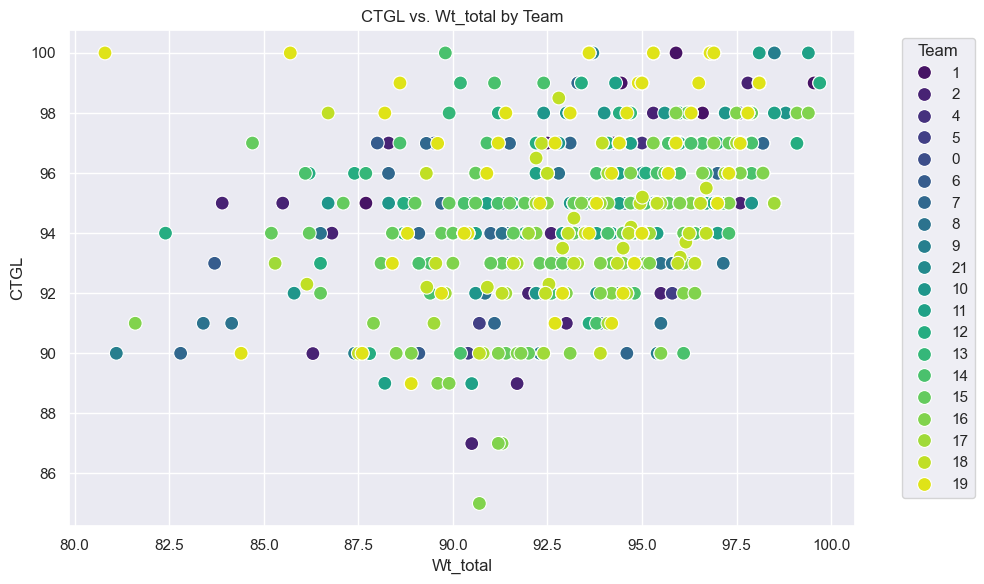

In [28]:
# Assuming m200_df is your DataFrame and it has columns 'CTGL' and 'Wt_total'

sns.set_theme(style="darkgrid") # set the theme for a better viz

# Create a scatter plot with 'team' as the hue
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
scatter = sns.scatterplot(data=m200_df, x='Wt_total', y='CTGL', hue='team', palette='viridis', s=100)
# 's' is the marker size

plt.title('CTGL vs. Wt_total by Team')
plt.xlabel('Wt_total')
plt.ylabel('CTGL')

# Optional: Add a legend outside the plot
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to make room for the legend

# Save the figure
plt.savefig('figure/m200_ctgl_wt_ttl.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show plot
plt.show()

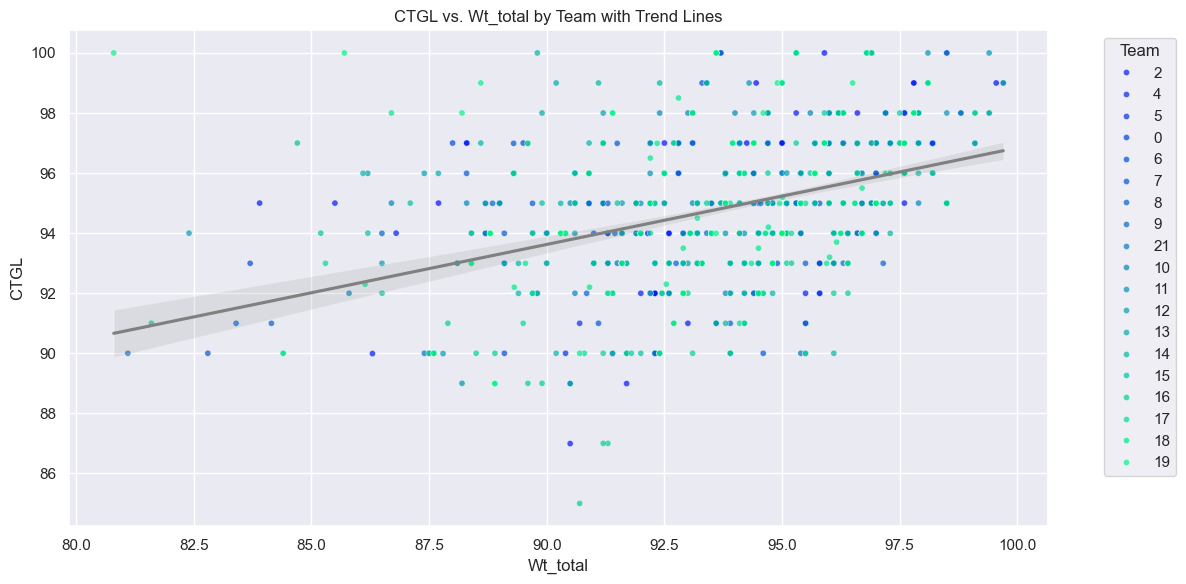

In [29]:
# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(12, 6))

# Plot the scatter plot with a regression line
scatter = sns.scatterplot(data=m200_df, x='Wt_total', y='CTGL', hue='team', palette='winter', s=20, alpha=0.7, ax=ax)

# Add a line of best fit for the overall trend
sns.regplot(data=m200_df, x='Wt_total', y='CTGL', scatter=False, ax=ax, color='gray')

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title="Team", bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the plot title and labels
ax.set_title('CTGL vs. Wt_total by Team with Trend Lines')
ax.set_xlabel('Wt_total')
ax.set_ylabel('CTGL')

# Save the figure
plt.savefig('figure/m200_trend_ctgl_wt_ttl.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.tight_layout()
plt.show()


1. Boxplots
Boxplots can be useful to show the distribution of CTGL scores across different teams or staff_gp. They give a clear summary of the median, quartiles, and outliers.

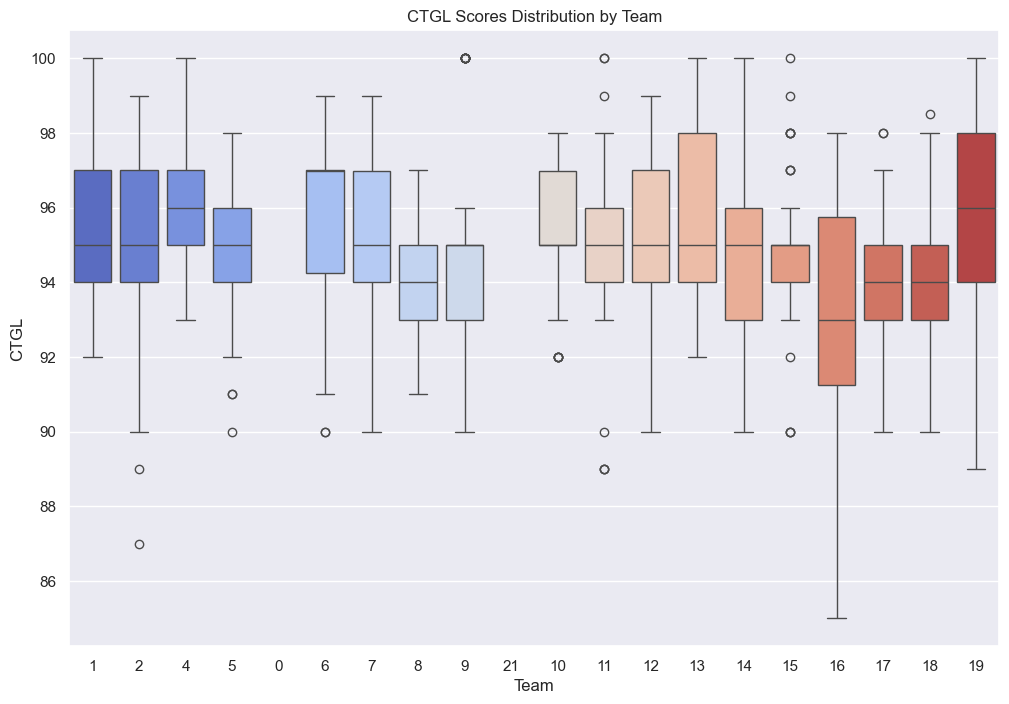

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=m200_df, x='team', y='CTGL', hue='team', palette='coolwarm', legend=False )
plt.title('CTGL Scores Distribution by Team')
plt.xlabel('Team')
plt.ylabel('CTGL')

# Save the figure
plt.savefig('figure/m200_boxplot_ctgl_wt_ttl.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI
plt.show()


2. Violin Plots
Violin plots are similar to boxplots but also include a kernel density estimation to show the probability density of the data at different values.

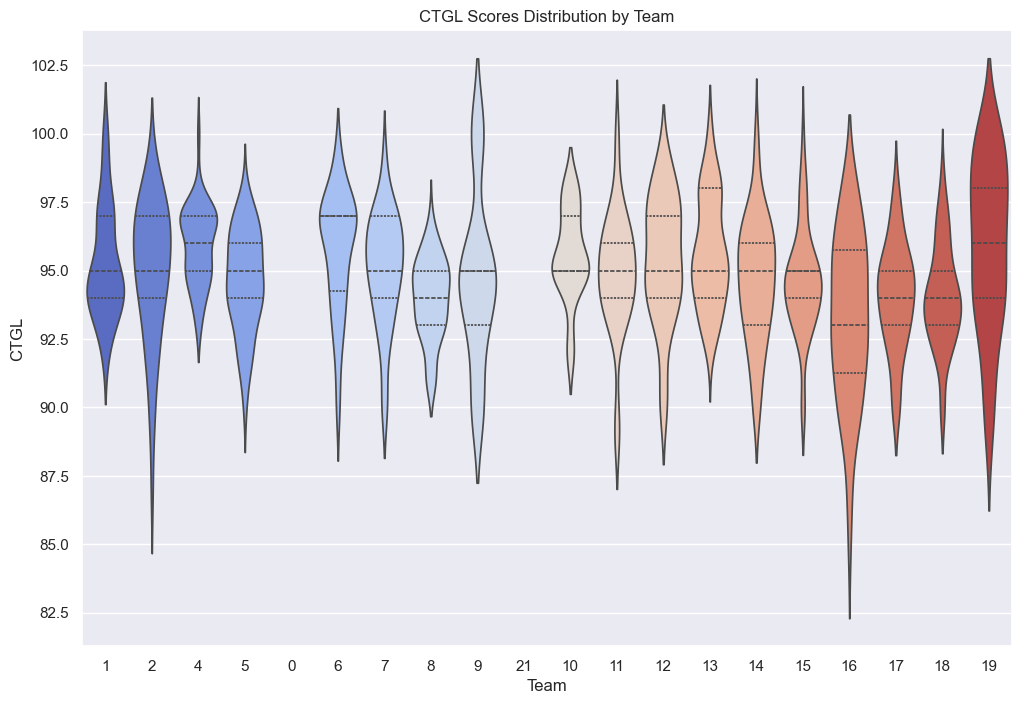

In [31]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=m200_df, x='team', y='CTGL', hue= 'team', palette='coolwarm', inner='quartile')
plt.title('CTGL Scores Distribution by Team')
plt.xlabel('Team')
plt.ylabel('CTGL')

# Save the figure
plt.savefig('figure/m200_violin_ctgl_wt_ttl.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

plt.show()


3. Heatmap
A heatmap can be used to show the correlation between different assessments, including CTGL. It's a great way to visualize the strength and direction of relationships.

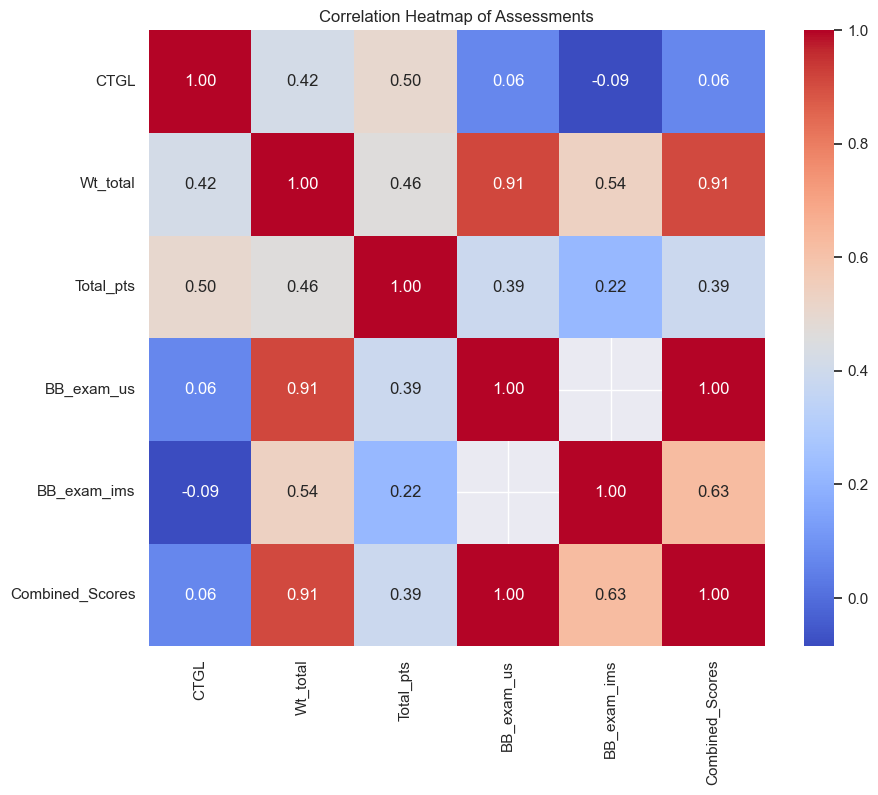

In [32]:
# Calculate the correlation matrix
corr = m200_df[['CTGL', 'Wt_total', 'Total_pts', 'BB_exam_us', 'BB_exam_ims', 'Combined_Scores']].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Assessments')

# Save the figure
plt.savefig('figure/m200_heatmap_ctgl_wt_ttl.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

plt.show()

4. Pair Plot
A pair plot (or scatterplot matrix) provides pairwise scatter plots for many variables. This is useful for quickly discovering any relationships between variables.

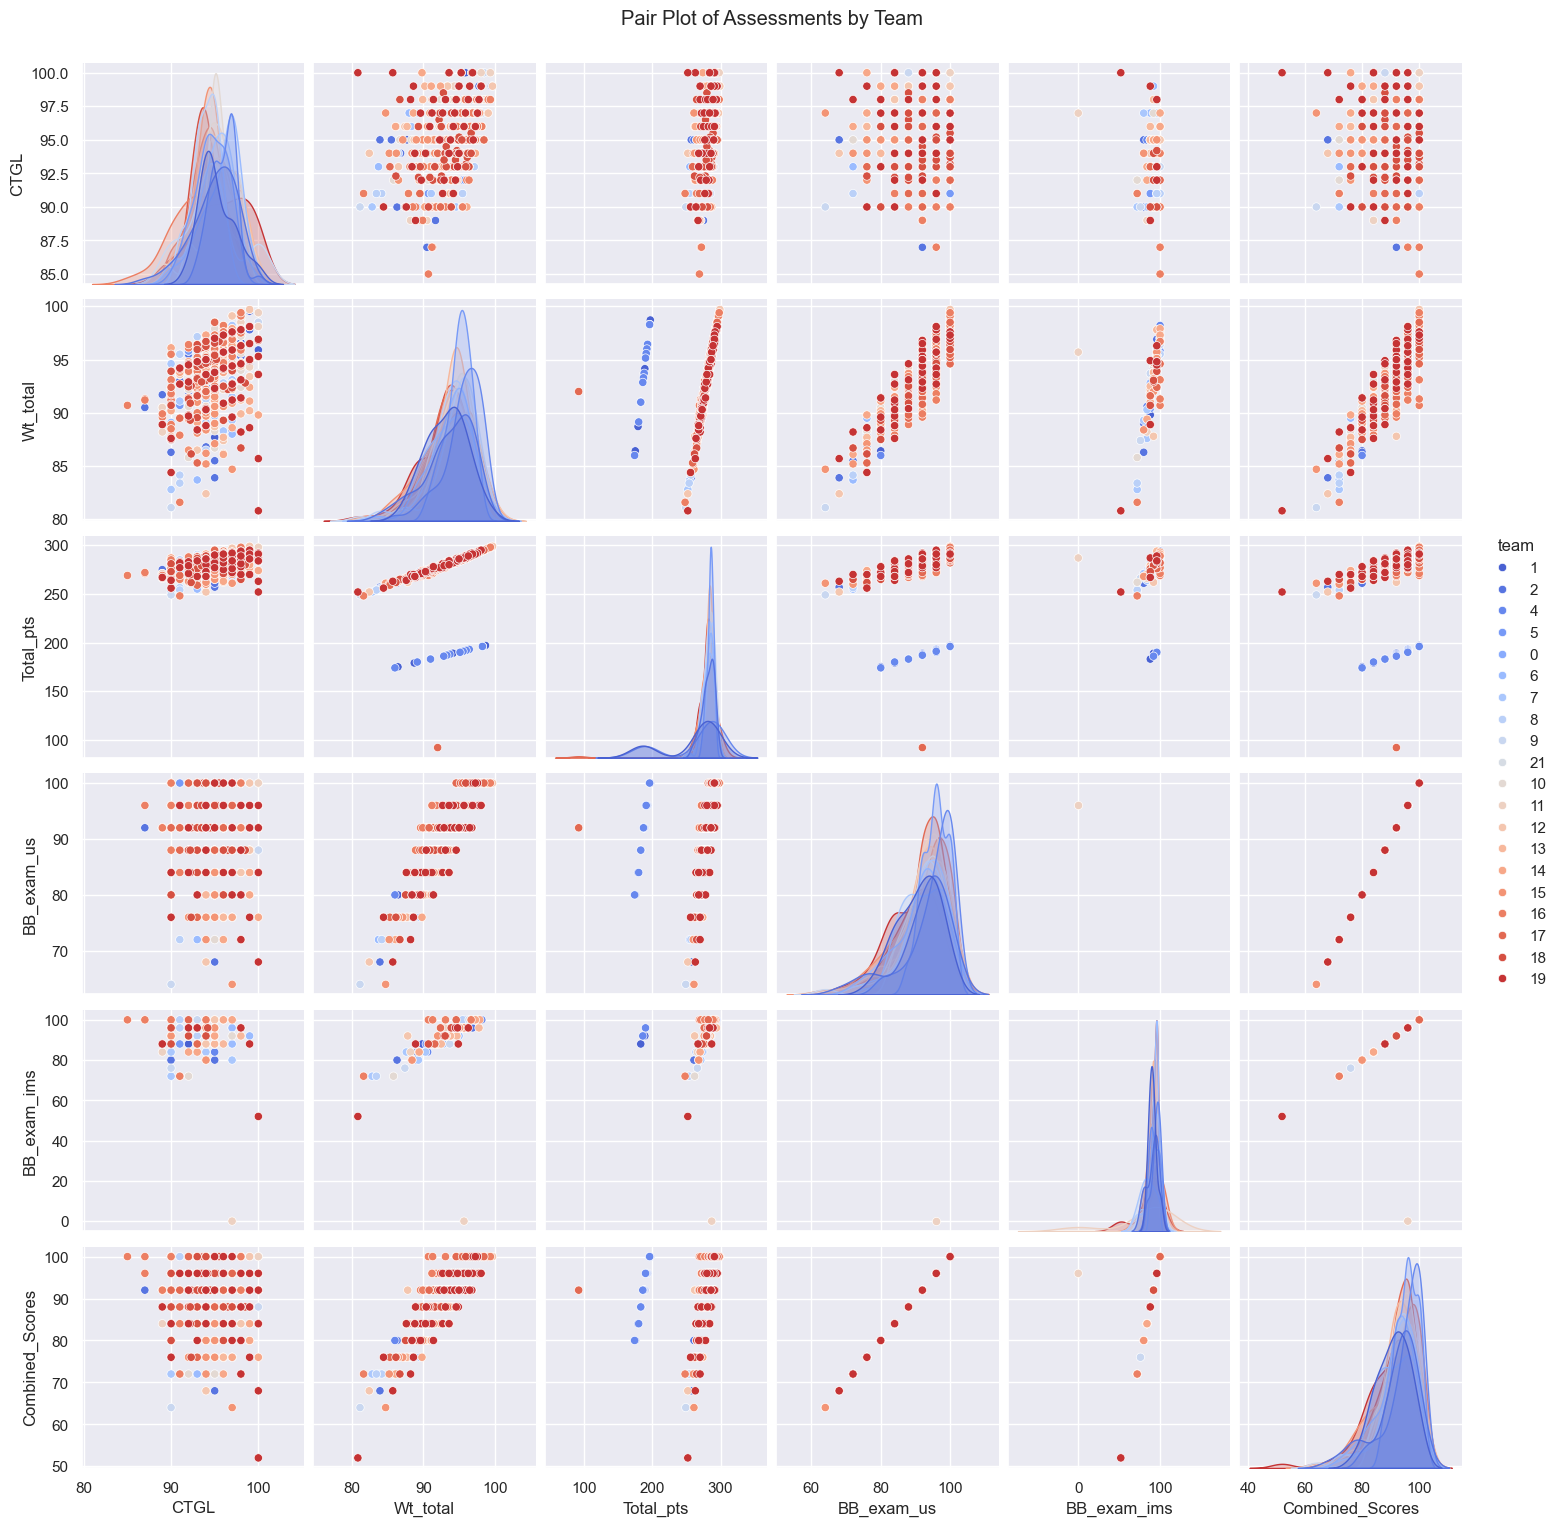

In [33]:
sns.pairplot(m200_df[['CTGL', 'Wt_total', 'Total_pts', 'BB_exam_us', 'BB_exam_ims', 'Combined_Scores', 'team']],
             hue='team', palette='coolwarm')

plt.suptitle('Pair Plot of Assessments by Team', y=1.02)

# Save the figure
plt.savefig('figure/m200_pair_plot_ctgl_wt_ttl.png', dpi=300)  # Saves the plot as a PNG file with 300 DP

plt.show()


5. Facet Grid
A Facet Grid can be used to create a grid of plots based on the values of certain columns. This can allow you to compare the relationship between CTGL and Wt_total across different levels of a categorical variable such as 'team' or 'staff_gp'.

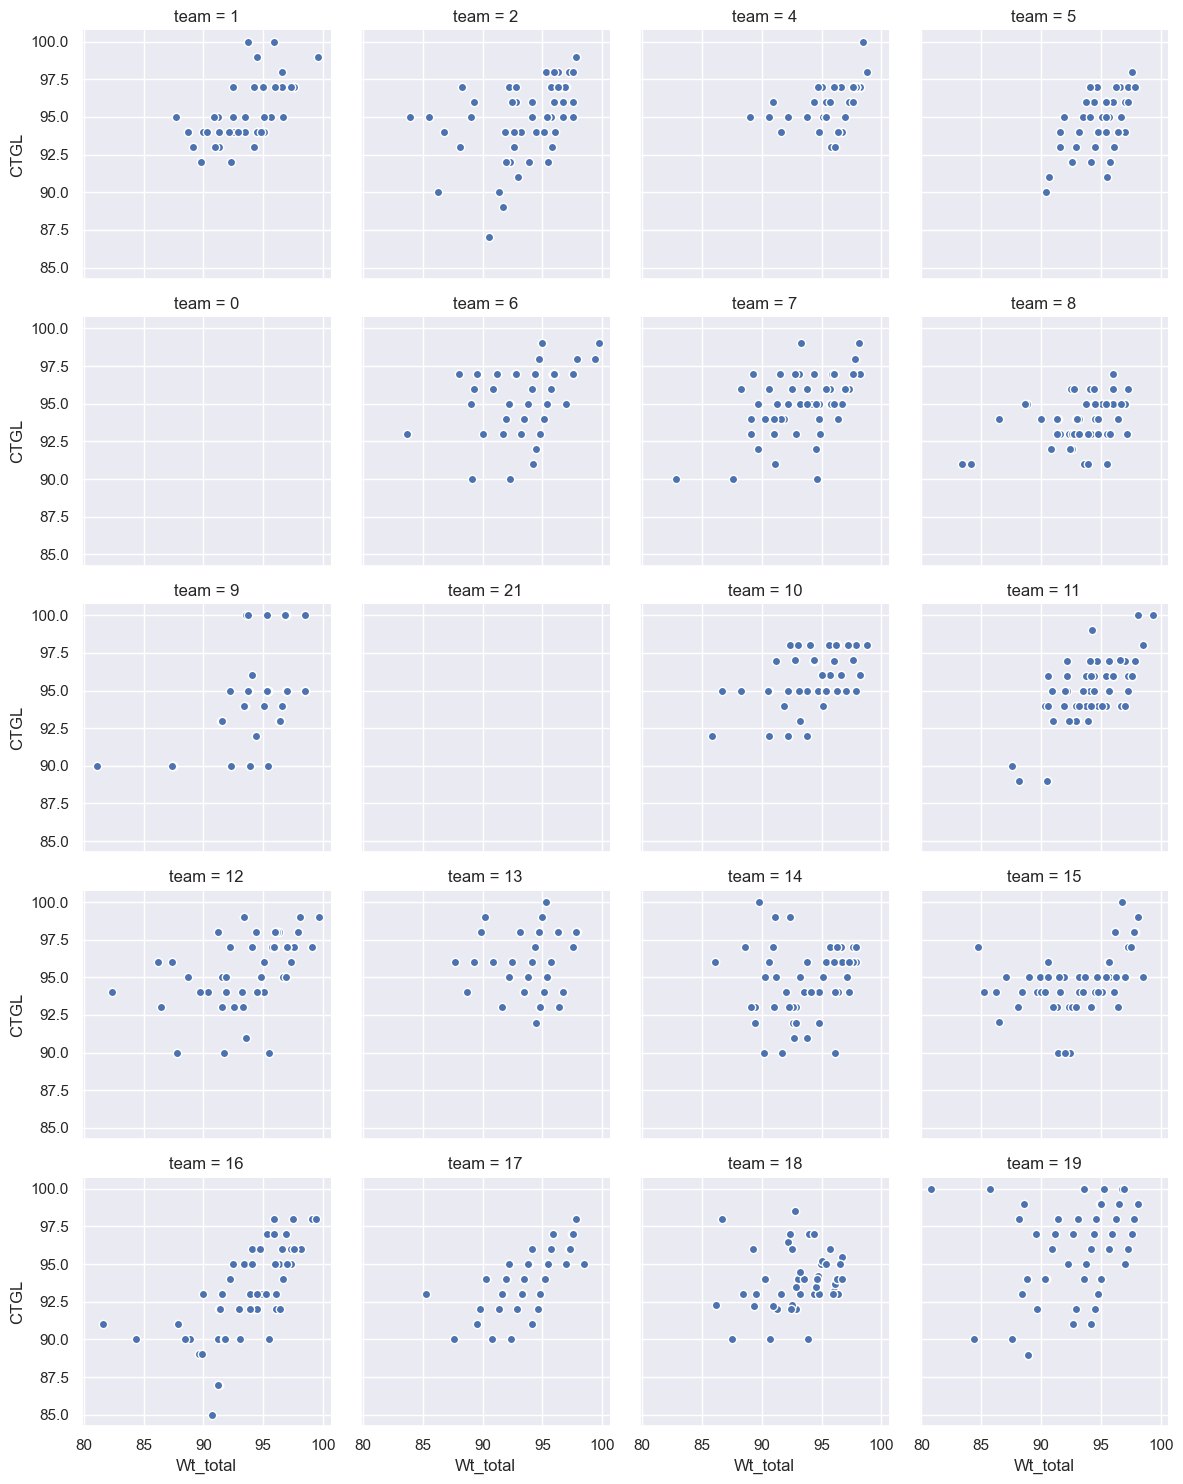

In [34]:
g = sns.FacetGrid(m200_df, col='team', col_wrap=4, height=3)
g = g.map(plt.scatter, 'Wt_total', 'CTGL', edgecolor="w")

# Save the figure
plt.savefig('figure/m200_facet_grid_ctgl_wt_ttl.png', dpi=300)  # Saves the plot as a PNG file with 300 DP


plt.show()


## Additonal Analysis

1. Grouped Boxplots or Violin Plots
These can show the distribution of CTGL scores for each staff group within each team, which would allow you to compare the central tendency and spread within the groups.

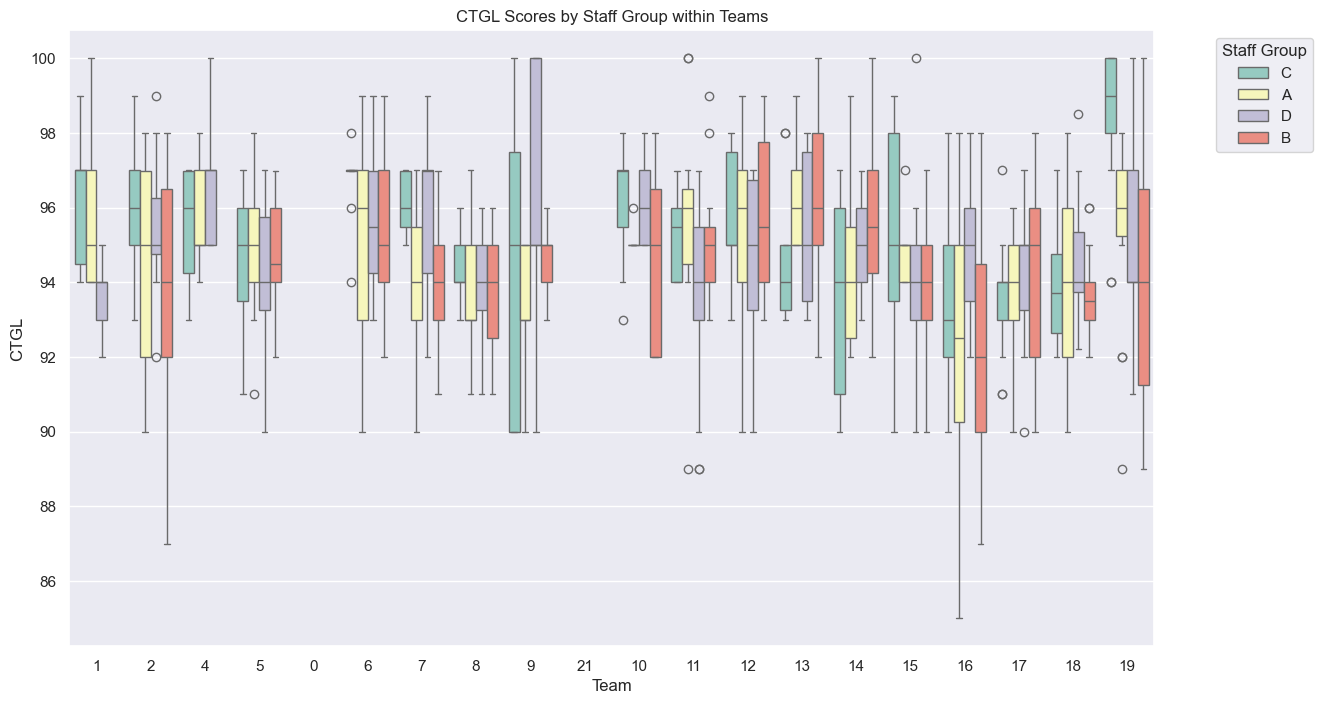

In [35]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=m200_df, x='team', y='CTGL', hue='staff_gp', palette='Set3')
plt.title('CTGL Scores by Staff Group within Teams')
plt.xlabel('Team')
plt.ylabel('CTGL')
plt.legend(title='Staff Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
plt.savefig('figure/m200_SG_ctgl.png', dpi=300)  # Saves the plot as a PNG file with 300 DP

plt.show()

2. Interaction Plot
An interaction plot can show whether the relationship between CTGL scores and teams is different for each staff group.

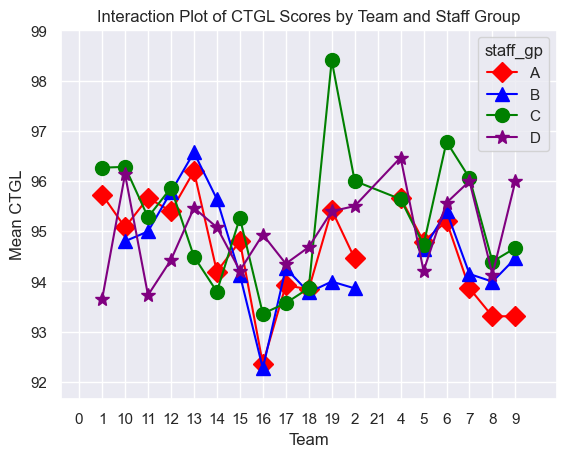

In [37]:
from statsmodels.graphics.factorplots import interaction_plot
import numpy as np

fig = interaction_plot(m200_df['team'], m200_df['staff_gp'], m200_df['CTGL'], 
                       colors=['red','blue','green','purple'], markers=['D','^','o','*'], ms=10)
plt.title('Interaction Plot of CTGL Scores by Team and Staff Group')
plt.xlabel('Team')
plt.ylabel('Mean CTGL')

# Save the figure
plt.savefig('figure/m200_Team_SG_interaction.png', dpi=300)  # Saves the plot as a PNG file with 300 DP

plt.show()

3. Point Plots
Point plots can be used to show the mean CTGL scores with confidence intervals for each staff group across different teams.

C:\Users\balla\AppData\Local\Temp\ipykernel_18256\3866676332.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=m200_df,


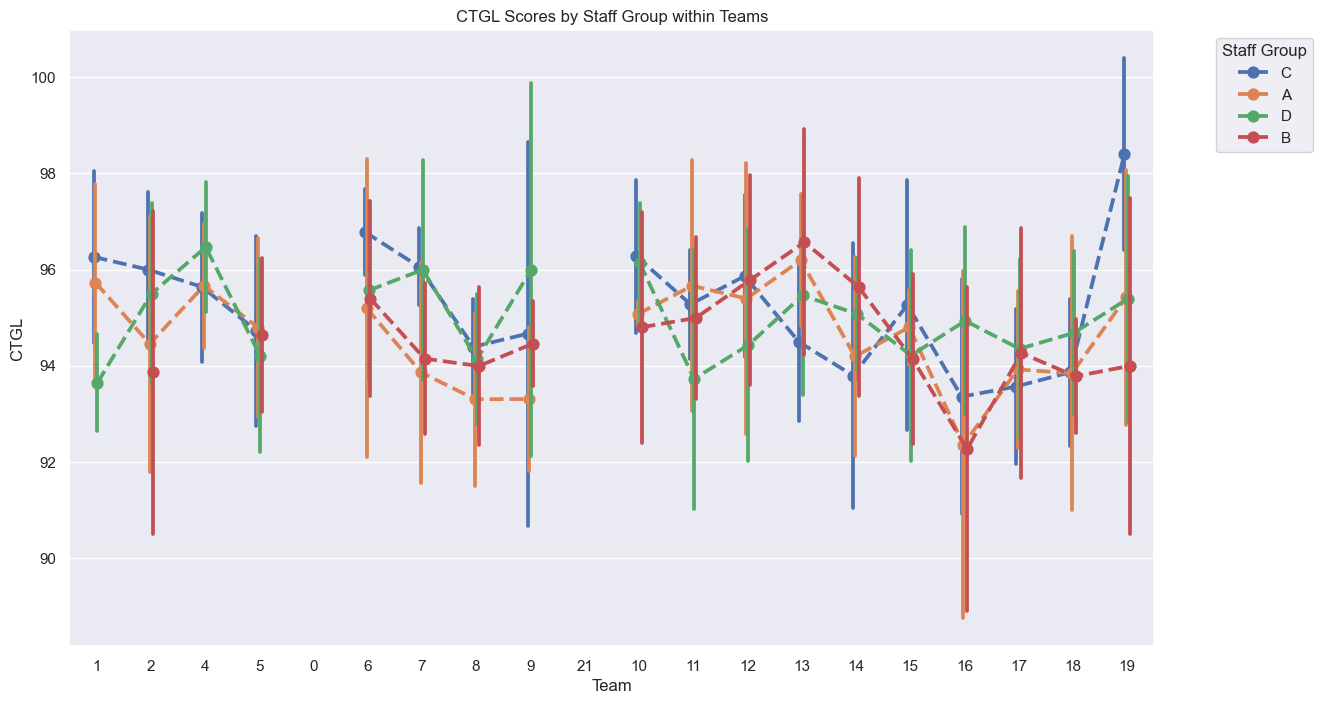

In [38]:
plt.figure(figsize=(14, 8))
sns.pointplot(data=m200_df,
              x='team',
              y='CTGL',
              hue='staff_gp',
              palette='deep',
              dodge=True,
              markers='o',
              linestyles='--',
              ci='sd')
plt.title('CTGL Scores by Staff Group within Teams')
plt.xlabel('Team')
plt.ylabel('CTGL')
plt.legend(title='Staff Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
plt.savefig('figure/m200_Team_SG_CTGL.png', dpi=300)  # Saves the plot as a PNG file with 300 DP

plt.show()